# ISM Manufacturing PMI

ISM Manufacturing PMI reflects business conditions in the US manufacturing sector in the specified month. The Institute of Supply Management (ISM) is a not-for-profit supply management organization in the United States, which has over 40,000 members.

The index is calculated based on a survey of representatives of several hundred companies from 18 US industries. Unlike Markit, ISM considers not only private companies but is based on the common NAICS (North American Industrial Classification System) list. Respondents describe the following aspects of their economic activity:

New orders received from clients
Output (speed and level)
Suppliers' delivery times (whether delivery performance is faster or slower)
Company's inventories
Customers' stocks (an approximate estimate of stocks stored by company's clients)
Prices, whether the company is paying for products and services more or less
Backlog of orders (increasing or decreasing)
New export orders, i.e. the number of orders received for further export
Imports — amount of imported materials
Employment in the company
The questionnaire features relative estimates: whether the situation is better, worse or has not changed. Responses are estimated taking into account weights of respondent companies.

The values are seasonally adjusted. The resulting manufacturing PMI is a composite of five diffuse indices with different weights (New orders, Output, Employment, Supplies and Inventories).

Readings above 50 point to improvements in the industry situation. Index below 50 is an indication of contraction in economic conditions of production. The further the value moves from the mark of 50, the greater the rate of situation change.

Manufacturing PMI is one of the most important indicators of economic health. Although the manufacturing sector is not a very important component of national GDP, it is still an early indicator of a coming recession or growth. Purchasing managers are among the first to know when the market conditions change, since they work in the short term and can evaluate a trend towards changing economic conditions. The index is released earlier than GDP and reports from the Bureau of Labor Statistics, therefore it is a leading indicator.

Manufacturing PMI growth is usually seen as positive for the US dollar.
                
## Source
- https://www.mql5.com/en/economic-calendar/united-states/ism-manufacturing-pmi

# Set Parameters

In [1]:
# Directory where I store original data (copied form the Web, etc.)
original_data_directory = "D:\\Drive\\market_indicators\\original\\"

# Directory where we will save data we create
derived_data_directory = "D:\\Drive\\market_indicators\\original\\"

# The file we analyze in this notebook
file_name = "united-states.ism-manufacturing-pmi.csv"

date_format = "yyyy.mm.dd" # 2007.04.05


"yyyy.mm.dd"

# Libraries Used

In [2]:
using DataFrames, CSV, Dates, Plots

# Read Data

## Identify the columns

In [3]:
using DataFrames, CSV

df = CSV.read(original_data_directory*file_name, dateformat=date_format)

for i in 1:size(df)[2] # number of columns
    println("column: ", i, " ", names(df)[i])
end

column: 1 Date
column: 2 ActualValue
column: 3 ForecastValue
column: 4 PreviousValue


In [4]:
# Sample the data

show(df[end-5:end, # row to row
        [1,2,3,4]] # column to column
    , allcols=true) # do NOT limit number of columns if more than 6

6×4 DataFrame
│ Row │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Date       │ Float64     │ Float64?      │ Float64?      │
├─────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 2007-08-01 │ 53.8        │ missing       │ 56.0          │
│ 2   │ 2007-07-02 │ 56.0        │ missing       │ 55.0          │
│ 3   │ 2007-06-01 │ 55.0        │ missing       │ 54.7          │
│ 4   │ 2007-05-01 │ 54.7        │ missing       │ 50.9          │
│ 5   │ 2007-04-02 │ 50.9        │ missing       │ 52.3          │
│ 6   │ 2007-03-01 │ 52.3        │ missing       │ missing       │

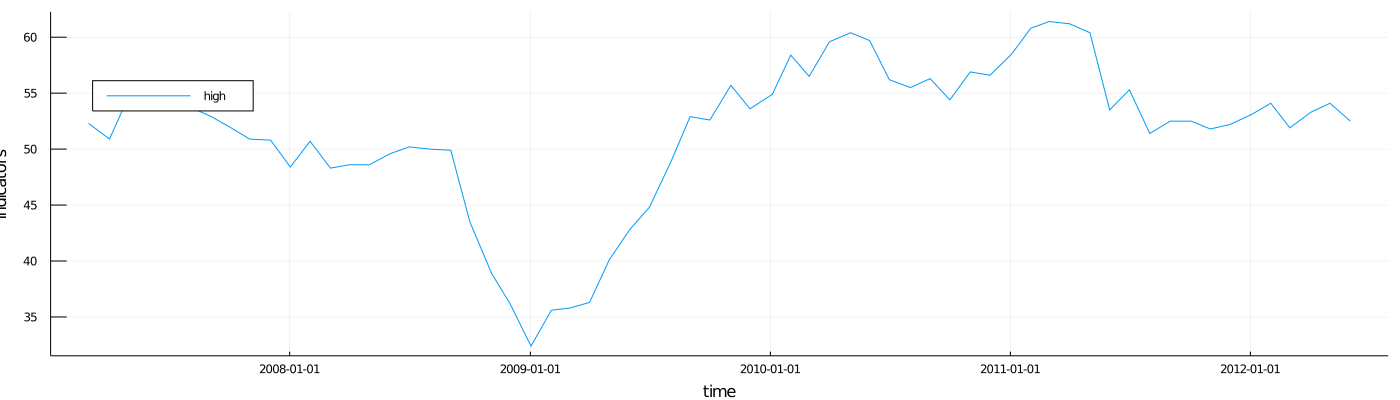

In [6]:
using Plots

rows = 100:163
gr()
plot(df[ rows,1 ], 
    [ df[rows,2] ], 
    label    = ["high" "low" "adjusted" "volume"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1400, 400), # width, height
    layout = (1, 1)
    )